# Problem 1 - Open reading frames and nested loops.

#### Note: do not use any bio-specific packages for this part. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1: 
Write a piece of code that creates a random DNA sequence of length
N (i.e. consisting of the letters ATGC) where we will start with N=500 base pairs (b.p.). Store the output in a variable called rand_seq. Hint: the random number generator functions within numpy may be useful. 

In [42]:
N = 500; # define sequence length
bases = np.array(['A','T','G','C'])
rand_seq = np.random.choice(bases,N) #this makes a numpy array with 500 random bases
print(''.join(rand_seq)) #print it nicely. 

AAAGTATTGAGAAGTCGCCATGAGTCGGACCTCCATATAGGACTTTATTAGCAATACTATATCCCTTTACCAGAGAGAAAGATCCTAGGACGATCACTCTTAGTCTTGACATAGAACACAAGTCATCCGTCAGAGACCAGGTCGGGTATCAATTAACAACCGATGTTTCCGAAGTTGAATGGTCCCGCTAGCGAGTCATGGCGTAACGATGACTATCTAATGGTAGAAAAGTGCTTGAACTGAGAGGTGGGCGAAAACTACTGCAGTATAGAAGTCCGAACGAAATCACTGCGAACCCGTGTGTACACCTGTATGGCCCAGAGCTTGAATTGTTTGAACCAGCTTCCACGTTTATTTGCGAACACTGTAAAGGAGTTAGTGCGAATCCCGCGAAAATGATCAGGCTGGCGATTAGCAAGCTATGGGTTTGGAACCATAGCTCGTTGACCGAGTCTCTCCGAATGAACAATGTCATGCCCTTGCAATGCCAGAAAGCCATA


### Part 2 
Open reading frames (ORFs) are pieces of DNA that can be
transcribed and translated. They start with a start codon (ATG) and end with a
stop codon (TAA, TGA, or TAG). Write a piece of code that finds the longest ORF 
in your seqeunce rand_seq.

### Lets first make a numpy array with all the codons. Here we will do this in a straightforward way with loops. See part 6 for a more concise solution that uses more of the features of numpy. 

In [136]:
allCodons = [] #empty list to store the codons

#step through the sequence storing one codon at a time as a string. 
for ii in range(len(rand_seq)-2):
    allCodons.append(''.join(rand_seq[ii:(ii+3)]))
    
allCodons = np.array(allCodons) #convert to numpy array

### Now lets find the stop and start codons:

In [137]:
starts = []
stops = []
for n, cod in enumerate(allCodons):
    if cod == 'ATG':
        starts.append(n)
    elif cod == 'TAA' or cod == 'TGA' or cod == 'TAG':
        stops.append(n)
starts = np.array(starts)
stops = np.array(stops)

### For each start codon, let's find the first stop codon that is a multiple of 3 base pairs away

In [138]:
firstStop = np.zeros(len(starts))
for n,sta in enumerate(starts):
    for sto in stops:
        if sto > sta and (sto-sta)%3 == 0: #stop must be after start and a multiple of 3 away
            firstStop[n] = sto
            break    #once we find the first stop codon meeting this criteria, we can move on the next one

### This has defined all the open reading frames. Now let's find the longest one and print the details

In [141]:
ORFLengths = firstStop - starts
indMax = np.argmax(ORFLengths)
longestLength = ORFLengths[indMax]

if longestLength > 0:
    print('The longest open reading frame is of length ' + str(int(longestLength))\
          + '. Starts at ' + str(int(starts[indMax])) \
          + '. Stops at ' + str(int(firstStop[indMax])))
else:
    print('No ORF found')

The longest open reading frame is of length 219. Starts at 495. Stops at 714


### Part 3: 
Copy your code in parts 1 and 2 but place it inside a loop that
runs 1000 times. Use this to determine the probability 
that an sequence of length 500 has an ORF of greater than 50 b.p.

In [75]:
N = 500
ORFFound = 0
for ii in range(1000):
    bases = np.array(['A','T','G','C'])
    rand_seq = np.random.choice(bases,N) #this makes a numpy array with 500 random bases
    allCodons = [] #empty list to store the codons

    #step through the sequence storing one codon at a time as a string. 
    for ii in range(len(rand_seq)-2):
        allCodons.append(''.join(rand_seq[ii:(ii+3)]))
    
    allCodons = np.array(allCodons) #convert to numpy array
    
    starts = []
    stops = []
    for n, cod in enumerate(allCodons):
        if cod == 'ATG':
            starts.append(n)
        elif cod == 'TAA' or cod == 'TGA' or cod == 'TAG':
            stops.append(n)
    starts = np.array(starts)
    stops = np.array(stops)
    firstStop = np.zeros(len(starts))
    for n,sta in enumerate(starts):
        for sto in stops:
            if sto > sta and (sto-sta)%3 == 0: #stop must be after start and a multiple of 3 away
                firstStop[n] = sto
                break    #once we find the first stop codon meeting this criteria, we can move on the next one
    if len(starts) == 0: #no start codons found, go on to the next sequence
        continue
        
    ORFLengths = firstStop - starts
    indMax = np.argmax(ORFLengths)
    longestLength = ORFLengths[indMax]
    if longestLength > 50:
        ORFFound = ORFFound + 1

print('The probability of finding an ORF longer than 50 b.p. is approximately ' + str(ORFFound/10) + '%.')

The probability of finding an ORF longer than 50 b.p. is approximately 92.3%.


### Part 4: 
Copy your code from part 3 but put it inside yet another loop,
this time over the sequence length N. Plot the probability of having an
ORF > 50 b.p. as a function of the sequence length.

In [93]:
valsToCheck = np.arange(40,1000,10)
probabilities = np.zeros(len(valsToCheck))
for q,N in enumerate(valsToCheck):    
    ORFFound = 0
    for ii in range(1000):
        bases = np.array(['A','T','G','C'])
        rand_seq = np.random.choice(bases,N) #this makes a numpy array with 500 random bases
        allCodons = [] #empty list to store the codons

        #step through the sequence storing one codon at a time as a string. 
        for ii in range(len(rand_seq)-2):
            allCodons.append(''.join(rand_seq[ii:(ii+3)]))

        allCodons = np.array(allCodons) #convert to numpy array

        starts = []
        stops = []
        for n, cod in enumerate(allCodons):
            if cod == 'ATG':
                starts.append(n)
            elif cod == 'TAA' or cod == 'TGA' or cod == 'TAG':
                stops.append(n)
        starts = np.array(starts)
        stops = np.array(stops)
        
        firstStop = np.zeros(len(starts))
        for n,sta in enumerate(starts):
            for sto in stops:
                if sto > sta and (sto-sta)%3 == 0: #stop must be after start and a multiple of 3 away
                    firstStop[n] = sto
                    break    #once we find the first stop codon meeting this criteria, we can move on the next one
        if len(starts) == 0: #no start codons found, go on to the next sequence
            continue

        ORFLengths = firstStop - starts
        indMax = np.argmax(ORFLengths)
        longestLength = ORFLengths[indMax]
        if longestLength > 50:
            ORFFound = ORFFound + 1
        probabilities[q] = ORFFound/1000


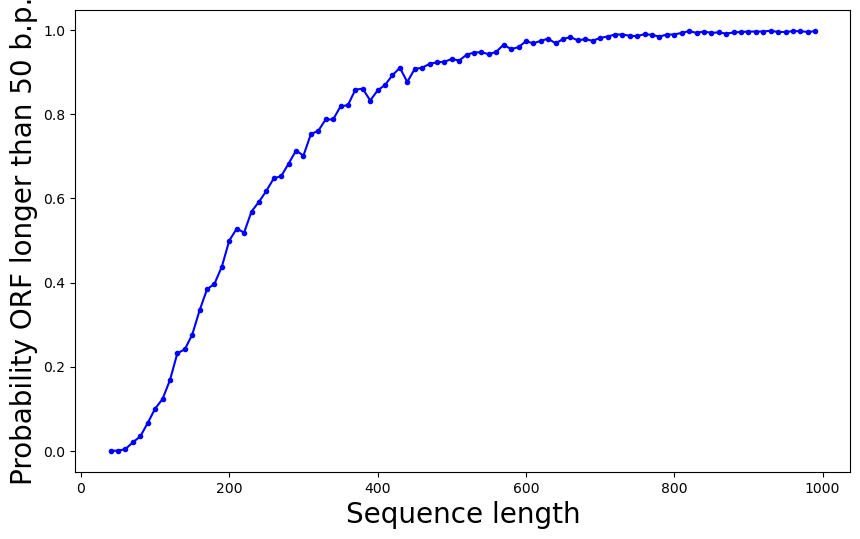

In [94]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(valsToCheck,probabilities,'b.-')
ax.set_xlabel('Sequence length',fontsize = 20)
ax.set_ylabel('Probability ORF longer than 50 b.p.',fontsize = 20);

### Part 5: 
Make sure your results from part 4 are sensible. What features
must this curve have (hint: what should be the value when N is small or when
N is very large? how should the curve change in between?) Make sure your plot looks like this.

Answer: The probability needs to be 0 when n is less than 50 and approach 100% as the sequence length gets long. It should rise monotoically (i.e. without going down) as the sequence length gets larger. Slight dips in the curve are due to noise associated with checking only 1000 sequences. 

### Part 6 \[required for 570 only\]
Write a solution for part 2 of this problem which is vectorized, that is, it does not require you to loop over sequences. Compare the time it takes to run the vectorized and non-vectorized code. Is one faster than the other? Are there other considerations when deciding which one to use? The [monotonic function](https://docs.python.org/3/library/time.html#time.monotonic) in the time module may be useful. 

In [140]:
import time

In [155]:
t1 = time.monotonic()
#first make the codon list using np.char.add (elementwise string concatenation) 
# and slicing the rand_seq variable. 
allCodons = np.char.add(np.char.add(rand_seq[:-2],rand_seq[1:-1]),rand_seq[2:]) #this does element wise concatenation

#get the stops and starts
starts = np.nonzero(allCodons == 'ATG')[0]
stops = np.nonzero(np.in1d(allCodons,['TAA','TGA','TAG']))[0]

#if we make starts a column vector and stops a row vector, we can subtract them and numpy 
# will automatically make a matrix of the difference between all starts and stops:

starts = starts.reshape(len(starts),1)
stops = stops.reshape(1,len(stops))
diffMatrix = stops - starts

#This boolean will be true for all potential open reading frames 
# (i.e. if stop is after start and divisible by 3)
possibleORF = (diffMatrix > 0) & (diffMatrix%3==0)

# Can use cumulative sum to find the first non-zero value. Repeat it so if there are multiple 1s in a row,
# only the first one will remain 1
shortestORF = possibleORF.cumsum(axis = 1).cumsum(axis =1) == 1 # this is only true for the ORF in each row
ORFLengths = diffMatrix[shortestORF] #get the corresponding ORF
maxLength = np.max(ORFLengths) #take the max

if maxLength > 0:
    stopStart = np.nonzero(diffMatrix == maxLength) #indices will give us the stop/start position
    print('The longest open reading frame is of length ' + str(int(maxLength))\
          + '. Starts at ' + str(int(starts[stopStart[0][0],0])) \
          + '. Stops at ' + str(int(stops[0,stopStart[1][0]])))
t2 = time.monotonic()
vectorizedRuntime = t2-t1

The longest open reading frame is of length 219. Starts at 495. Stops at 714


Now lets run the non-vectorized code again using the timer:

In [156]:
t3 = time.monotonic()
allCodons = [] #reset
#step through the sequence storing one codon at a time as a string. 
for ii in range(len(rand_seq)-2):
    allCodons.append(''.join(rand_seq[ii:(ii+3)]))

allCodons = np.array(allCodons) #convert to numpy array

starts = []
stops = []
for n, cod in enumerate(allCodons):
    if cod == 'ATG':
        starts.append(n)
    elif cod == 'TAA' or cod == 'TGA' or cod == 'TAG':
        stops.append(n)
starts = np.array(starts)
stops = np.array(stops)
firstStop = np.zeros(len(starts))
for n,sta in enumerate(starts):
    for sto in stops:
        if sto > sta and (sto-sta)%3 == 0: #stop must be after start and a multiple of 3 away
            firstStop[n] = sto
            break    #once we find the first stop codon meeting this criteria, we can move on the next one

ORFLengths = firstStop - starts
indMax = np.argmax(ORFLengths)
longestLength = ORFLengths[indMax]
if longestLength > 50:
    ORFFound = ORFFound + 1
t4 = time.monotonic()

In [222]:
print('vectorized: ' + str(t2-t1) + 'seconds\nNon-vectorized ' + str(t4-t3) + ' seconds')

vectorized: 0.0027776430069934577seconds
Non-vectorized 0.004783081996720284 seconds


#### Running the above several times, we see that the vectorized code in this case is approximately 2x faster. There are, however, other considerations. One is the readability of the code. The vectorized code is more obscure. Another is how much memory is being used. For example, it we wanted to vectorize part 3, we would need to generate all 1000 sequences in a big matrix at once. Using a loop we can work with one sequences at a time. 

# Problem 2 data input/output and simple analysis
The file qPCRdata.txt is an actual file that comes from a Roche
LightCycler qPCR machine. The important columns are the Cp which tells
you the cycle of amplification and the position which tells you the well
from the 96 well plate. Each column of the plate has a different gene and
each row has a different condition. Each gene in done in triplicates so
columns 1-3 are the same gene, columns 4-6 the same, etc.
so A1-A3 are gene 1 condition 1, B1-B3 gene 1 condition 2, A4-A6 gene 2
condition 1, B4-B6 gene2 condition 2 etc. 

### Part1: 
write code to read the Cp data from this file into a vector. You can ignore the rows with positions beginning with G and H as there were no samples here. 

In [6]:
f = open('qPCRdata.txt','r')
cpData = []
lineCounter = 0 # will use this to ignore the first two lines. 
for line in f:
    if lineCounter > 1:
        line_split = line.split('\t') # line is tab-delimitted
        cpData.append(line_split[4])
    lineCounter = lineCounter + 1
cpData = np.array(cpData[:72]).astype(float) #put into numpy array, convert strings to floats

### Part 2: 
Transform this vector into an array representing the layout of the plate. e.g. a 6 row, 12 column array should that data(1,1) = Cp from A1, data(1,2) = Cp from A2, data(2,1) = Cp from B1 etc. 

In [7]:
# We can do this in a straightforward way with a loop:
cpDataReshape = np.zeros((6,12))

for row,ii in enumerate(np.arange(0,72,12)):
    cpDataReshape[row] = cpData[ii:(ii+12)]
    
#Alternative, we could use the numpy reshape function and do this without a loop. 
#cpDataReshape = cpData.reshape(6,12)

### Part 3. 
The 4th gene in columns 10 - 12 is known as a normalization gene. That is, it's expression should not change between conditions and it is used to normalize the expression values for the genes. For the other three genes, compute their normalized expression in all  conditions (using the normalization gene) and then further normalize this to condition 1. In other words, normalize to the normalization gene and compute the fold change between each conditions and condition 1. The formula for this is $2^{[Cp0 - CpX - (CpN0 - CpNX)]}$ where Cp0 is the Cp for the gene in the 1st condition, CpX is the value of Cp in condition X and CpN0 and CpNX are the same quantitites for the normalization gene. Plot this data in an appropriate way. 

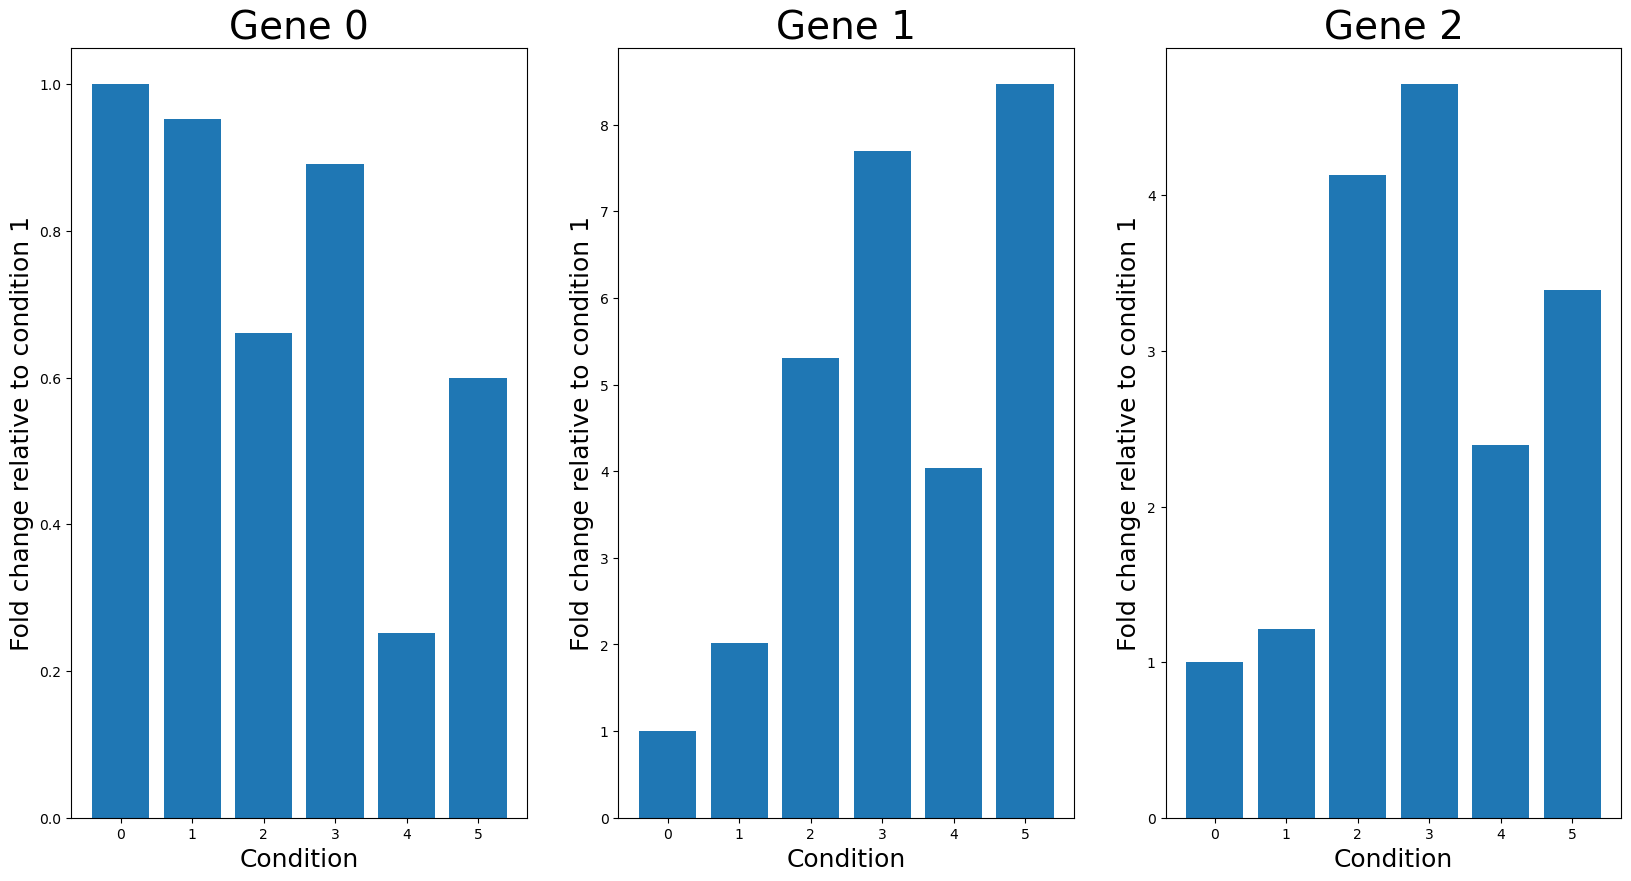

In [8]:
#Make some variables to store the data
geneCps = np.zeros((3,6)) #to store average data 
geneNormExp = np.zeros(geneCps.shape) #to store fold changes
#Average the normalization gene and subtract the Cp for condition 0
normCp = np.mean(cpDataReshape[:,10:12],axis = 1) #mean for normalization gene
normCp = normCp - normCp[0]

#compute the gene expression for each gene
for ii in np.arange(3):
    geneCps[ii] = np.mean(cpDataReshape[:,(3*ii):(3*(ii+1))],axis = 1) #take the mean over the three columns for each gene
    geneCps[ii] = geneCps[ii]-geneCps[ii][0] #subtract 1st condition
    geneNormExp[ii] = np.exp2(-(geneCps[ii]-normCp))
    
#Make the plots. Here we will use three separate barplots, one for each gene. 
fig, ax = plt.subplots(1,3,figsize = (20,10))
for ii in np.arange(3):
    ax[ii].bar(np.arange(6),geneNormExp[ii])
    ax[ii].set_title('Gene ' + str(ii),fontsize = 28)
    ax[ii].set_ylabel('Fold change relative to condition 1',fontsize = 18)
    ax[ii].set_xlabel('Condition',fontsize = 18)

### Part 4 [Only required for 570]
 Assume that the error in each Cp is the standard deviation of the three measurements. Add a section to your code that propogates this uncertainty to the final results. Add error bars to your plot. (on propagation of error, see, for example: [wikipedia link](https://en.wikipedia.org/wiki/Propagation_of_uncertainty)

Using the error propagation formula, we find that if $$f = 2^{[Cp0 - CpX - (CpN0 - CpNX)]}$$
Then $$ \Delta f = \ln(2) f \sqrt{(\Delta Cp0)^2 +(\Delta CpX)^2+(\Delta CpN0)^2+(\Delta CpNX)^2} $$
So we need to compute the errors in each individual Cp and compute this formula for each fold change. 

In [21]:
#we start by computing the means and standard deviations for each cp as above:

#Average and standard deviation for the normalization gene
normCp = np.mean(cpDataReshape[:,10:12],axis = 1)
normCpStd = np.std(cpDataReshape[:,10:12],axis = 1) #mean for normalization gene

#compute the gene expression and standard deviationfor each gene
geneCpsStd = np.zeros((3,6)) #to store average data 
for ii in np.arange(3):
    geneCps[ii] = np.mean(cpDataReshape[:,(3*ii):(3*(ii+1))],axis = 1) #take the mean over the three columns for each gene
    geneCpsStd[ii] = np.std(cpDataReshape[:,(3*ii):(3*(ii+1))],axis = 1) #take the mean over the three columns for each gene

#Now compute the errors:
normCpStdUse = normCpStd*normCpStd+normCpStd[0]*normCpStd[0] #condition 0 factors into all calculations as per the formula
geneCpsStdUse = geneCpsStd*geneCpsStd+(geneCpsStd[:,0].reshape(3,1)*geneCpsStd[:,0].reshape(3,1)) #reshape need for numpy casting

errors = np.log(2)*geneNormExp*np.sqrt(normCpStdUse+geneCpsStdUse) 

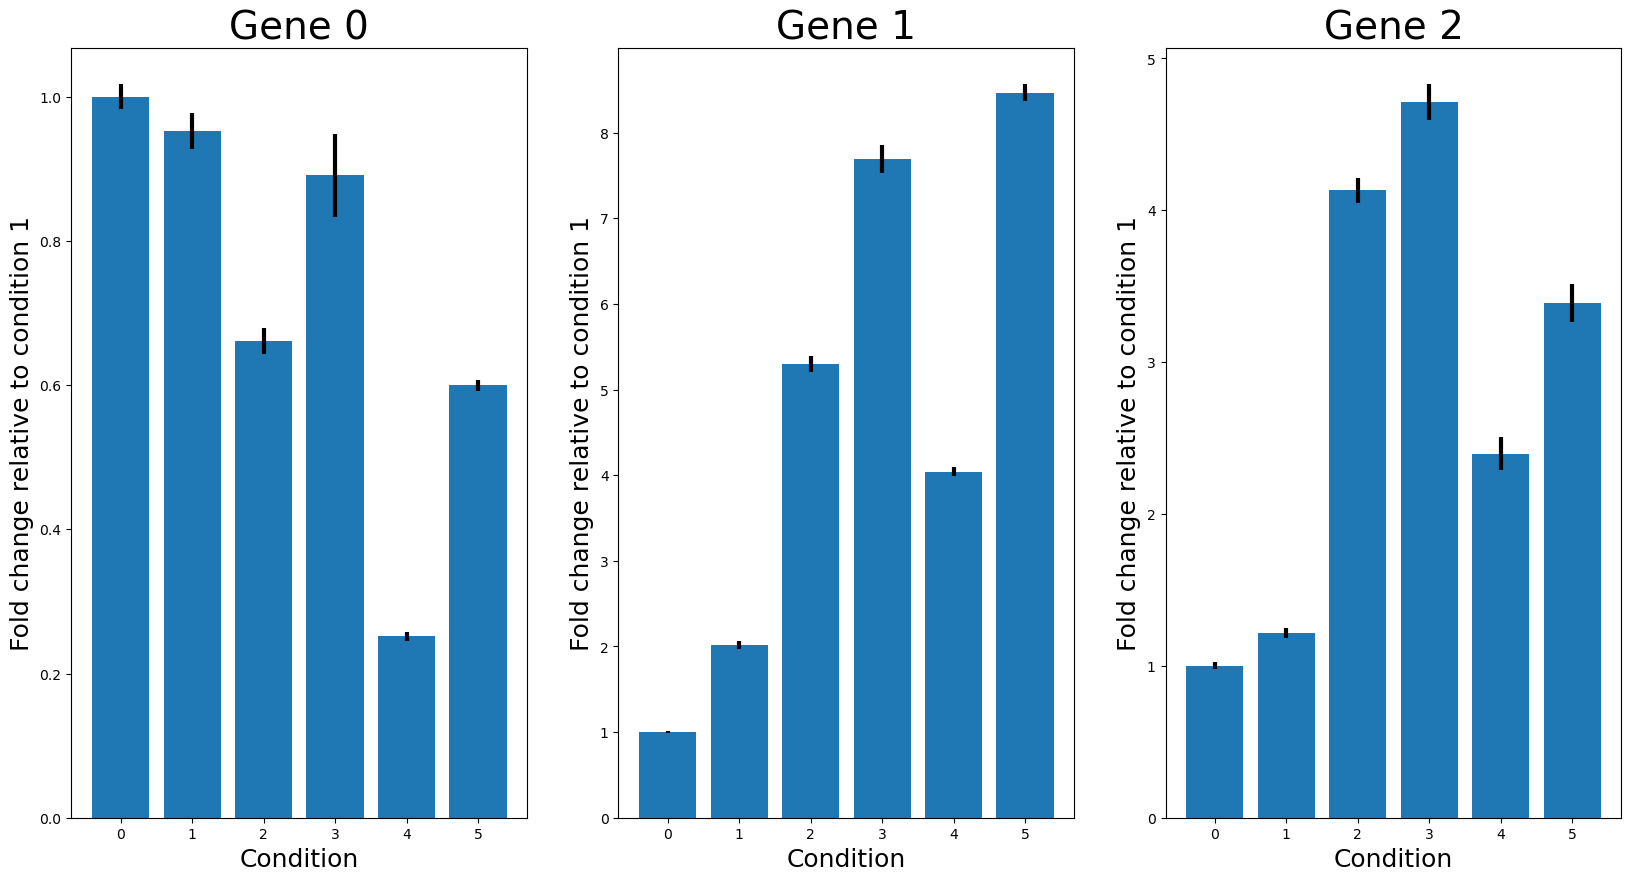

In [28]:
#Make the plots as before. Add the errorbar plot at the end to add the errorbars. none setting ls (linestyle) to none, 
# so the errorbars won't be connected with lines. 
fig, ax = plt.subplots(1,3,figsize = (20,10))
for ii in np.arange(3):
    ax[ii].bar(np.arange(6),geneNormExp[ii])
    ax[ii].set_title('Gene ' + str(ii),fontsize = 28)
    ax[ii].set_ylabel('Fold change relative to condition 1',fontsize = 18)
    ax[ii].set_xlabel('Condition',fontsize = 18)
    ax[ii].errorbar(np.arange(6),geneNormExp[ii],errors[ii],color = 'k',ls='none',linewidth = 3)

In [29]:
np.reshape()

TypeError: reshape() missing 2 required positional arguments: 'a' and 'newshape'